# COGS 108 - Final Project 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [X] YES - make available
* [  ] NO - keep private

# Overview

Yelp has normalized the reviewing of businesses. This system has benefited its users by allowing them to read on other people’s experiences and opinions, along with updating them on the business’s amenities. This can be either problematic or valuable to businesses. It allows them to receive feedback on how to improve their business and either attracts or dissuades potential customers. In the modern day, Yelp tends to play a factor in and reflect a business’s success. Our project analyzes Yelp data to determine the effects of a business’s location on a business’s success (based off the area and environment it is in). This analysis is used to determine the likelihood of a business’s success based on the location it is set up in. 

# Names

- Shih Wen Ma
- Andrea Diaz
- Viet Nguyen
- Manda Tran
- Matthew Luu

# Group Members IDs

- A15469802
- A15084975
- A13702483
- A14452168
- A16067866

# Research Question

How does the state a restaurant is located in (specifically the United States) affect the success of restaurants? Can you predict a restaurant’s success based on the location?

## Background and Prior Work

Yelp is an online service in which anyone with an account can comment on and/or rate a business. It allows users to make informed decisions on whether or not they want to receive services from them. For businesses, it is a platform for them to receive feedback on their services, such as what customers would like to see and what improvements they can make. This platform is used by both sides to gauge how successful and/or promising a business is. As such, we focus on Yelp data to help us determine the success of a restaurant (determined by ratings and number of reviews) based on location. 

When evaluating whether a Yelp data set is the most appropriate for our question, we analyzed the credibility and bias of the dataset. We researched possible factors that could affect the accuracy of the dataset in reflecting the success of a restaurant. One major question we asked is: “Is the data corrupt?”. Upon further research, we found that Yelp does manipulate reviews. They filter out data that they think are fake, but this algorithm is not always correct. The filter affects the success because it is manipulating the data, thus removing data that could potentially affect the ratings of the business. In addition, they accept payments from businesses to advertise for them and/or hide bad reviews while highlighting more favorable ones. This would skew the data because it means that restaurants who pay Yelp to do this are more likely to receive more customers and reviews, thus making the business (seem) more successful than its competitors. Another major aspect we considered was how the bandwagon effect could affect the ratings of a restaurant. We found that current ratings do affect future ratings, which further cements the skew of the data. This affects small businesses, as they are often overshadowed by larger businesses who have the resources to pay Yelp for advertisements and extra services. 

We have decided to move forward with using the Yelp dataset with these concerns in mind. We concluded that while these factors may affect the accuracy in reflecting the success of a restaurant, they also affect the success of the restaurant. These factors change the way the business is reflected through Yelp, a popular platform used by people to determine whether or not they want to utilize the business’s services. By playing a role in a potential customer’s choice in utilizing the service, Yelp indirectly affects the success of the restaurant. Therefore, it is safe to continue using the Yelp dataset, given that these factors also influence the restaurant’s success. 

While doing initial research on Yelp dataset, we came across the Yelp Dataset Challenge. We noticed 2-3 projects that had to do with predicting the success of a business. For example, one project predicted success based on the text in the reviews which were analyzed based on sentiment (reference #5) using machine learning models. However, we could not find any projects or reports that looked into the effect of different locations on the ratings of restaurants which is why we thought it would be an interesting topic to focus on. 

References (include links):
- 1) The Yelp Review Filter: https://vivial.net/blog/how-to-avoid-the-yelp-review-filter-and-get-more-positive-reviews/
- 2) The Yelp Effect https://rbj.rady.ucsd.edu/index.php/topics/social-impact/2014/01/the-yelp-effect/
- 3) Fake Yelp Reviews
    - https://smallbusiness.yahoo.com/advisor/writing-fake-reviews-yelp-might-sued-173135209.html
    - https://www.businessinsider.com/20-percent-of-yelp-reviews-fake-2013-9
- 4) The Yelp Factor https://hbswk.hbs.edu/item/the-yelp-factor-are-consumer-reviews-good-for-business
- 5) Yelp Dataset Challenge 1 https://github.com/VC444/Yelp-Dataset-Challenge 

# Hypothesis


Location will have a large effect on the rating because it sets up the environment and customer expectations the business needs to fulfill. The most popular type of food in a specific area will be set at a higher standard by the consumers and therefore have harsher ratings. For example, we believe that if Mexican food is very popular in San Diego, then Chipotle chain restaurants, known for its Mexican-style cuisine, will generally have lower ratings due to the fact that there are more local restaurants that specialize in Mexican food. Therefore, we will also place an emphasis on chain restaurants and compare our findings to local restaurants. 

# Dataset(s)

- Dataset Name: Yelp Categories (categories.json)
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/all_category_list
- Number of observations: 1,563 observations

This data was used to gather all the relevant categories to collect our data using the Yelp API. We found the categories by finding all the rows who's parent category contained 'restaurant' in it.


- Dataset Name: Yelp Restaurant Data Across America
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/business_search
- Number of observations: 150,980 observations

The data was collected by using a Yelp API and the github repo: https://github.com/gfairchild/yelpapi. We used the dataset categories.json to find all the relevant restaurant categories and ran a search query for each state. The data contains the name of the restaurant, the location (including latitude and longitude), the average rating, the applicable categories, and the number of customer reviews.


- Dataset Name: Fast Food Restaurants Across America
- Link to the dataset: https://www.kaggle.com/datafiniti/fast-food-restaurants#FastFoodRestaurants.csv
- Number of observations: 10,000 observations

This dataset provides information about 10,000 fast food restaurants across America. The data was collected from Datafiniti's Business Database in March 2018. We are using this dataset to understand which fast food chains are the most popular across the US (per state) based on the number of locations. While the data comes from a reliable source, the completion of the dataset is cannot be confirmed because there was no free option to download the data directly from the source so we had to download the data from kaggle.com. The data includes the fast food restaurant, its location, and website.


# Setup

In [26]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import dataframes from csv files

In [2]:
yelp_df = pd.read_csv('data/YelpRestaurants.csv')
fast_df = pd.read_csv('data/FastFoodRestaurants.csv')
fast_ratings_df = pd.read_csv('data/FastRatings.csv')

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [4]:
#turns all name to lowercase so capitalization does not affect analysis
for i in yelp_df.index:
    yelp_df.at[i,'name'] = yelp_df.at[i,'name'].lower()
for j in fast_df.index:
    fast_df.at[j, 'name'] = fast_df.at[j, 'name'].lower()
for k in fast_ratings_df.index:
    fast_ratings_df.at[k, 'name'] = fast_ratings_df.at[k, 'name'].lower()

#### Clean data in the yelp_df

In [5]:
#Separate longitude and latitude information from coordinates column for the yelp_df
yelp_df['latitude'] = np.nan
yelp_df['longitude'] = np.nan
for i in yelp_df.index:
    coord = yelp_df.at[i, 'coordinates']
    yelp_df.at[i, 'latitude'] = coord[coord.find(':') + 1 : coord.find(',')]
    yelp_df.at[i, 'longitude'] = coord[coord.find(':', coord.find(',') + 1) + 1 : coord.find('}')]

yelp_df = yelp_df.drop('coordinates',axis=1)

In [6]:
#Separate address information from location column for the yelp_df
yelp_df['address'] = ''
for i in yelp_df.index:
    address = yelp_df.at[i, 'location']
    yelp_df.at[i, 'address'] = address[address.find(':') + 3 : address.find(',') - 1]

yelp_df = yelp_df.drop('location', axis=1)

In [18]:
#Drop unnamed column from yelp_df
yelp_df = yelp_df.drop(['Unnamed: 0'], axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [10]:
yelp_df

,name,category,rating,review_count,state,latitude,longitude,address
0,el barrio,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,615,AL,33.516636,-86.802849,2211 2nd Ave N
1,saw's soul kitchen,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.5,782,AL,33.524190,-86.773830,215 41st St S
2,yo' mama's,"[{'alias': 'newamerican', 'title': 'American (...",4.5,356,AL,33.517660,-86.801830,2328 2nd Ave N
3,carrigan's public house,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,527,AL,33.517124,-86.798646,2430 Morris Ave
4,highlands bar & grill,"[{'alias': 'southern', 'title': 'Southern'}, {...",4.5,298,AL,33.500572,-86.795577,2011 11th Ave S
...,...,...,...,...,...,...,...,...
150975,penny ann's cafe,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...",4.0,1077,UT,40.730936,-111.891403,1810 S Main St
150976,valter's osteria,"[{'alias': 'italian', 'title': 'Italian'}]",4.5,618,UT,40.762516,-111.896202,173 W Broadway
150977,whiskey street,"[{'alias': 'lounges', 'title': 'Lounges'}, {'a...",4.0,1065,UT,40.762160,-111.890699,323 S Main St
150978,zest kitchen & bar,"[{'alias': 'gluten_free', 'title': 'Gluten-Fre...",4.5,782,UT,40.763268,-111.896446,275 S 200th W


In [30]:
# DATA CLEANING MEXICAN RESTAURANTS
mex_list = []
for i in yelp_df.index:
    is_mex = 'mexican' in yelp_df['category'].iloc[i]
    mex_list.append(is_mex)
temp = yelp_df.assign(mex=mex_list)
mexican = temp[temp['mex'].values==True]

mexican_rating = mexican.groupby('state').rating.mean()
mexican_rating

state
AL    4.50
AZ    4.50
CA    4.50
CO    4.00
FL    4.00
IA    4.50
IL    4.00
IN    4.50
KS    3.50
KY    4.50
MA    4.00
MD    4.50
MI    4.50
MS    4.00
NC    4.50
ND    4.25
NH    4.50
NJ    4.50
NM    4.30
NV    4.50
OH    4.50
OK    4.00
PA    4.00
SC    4.75
SD    4.50
TN    4.50
UT    4.50
WA    4.50
WI    4.50
WV    4.00
WY    4.00
Name: rating, dtype: float64

#### Clean data in the fast_ratings_df

In [8]:
to_drop = []
for i in fast_ratings_df.index:
    if ("'country': 'US'" in fast_ratings_df['location'][i]):
        continue
    else:
        to_drop.append(i)
fast_ratings_df = fast_ratings_df.drop(to_drop)
fast_ratings_df['state'].unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'IN', 'OK', 'LA', 'ND', 'TX', 'MI',
       'MO', 'TN', 'NC', 'GA', 'UT', 'WI', 'MS', 'WA', 'NE', 'AL', 'WV',
       'VT', 'AZ', 'KS', 'MN', 'SD', 'NM', 'OR', 'ME', 'IA', 'WY', 'IL',
       'VA', 'MT', 'ID', 'PA', 'NJ', 'MD', 'FL', 'CA', 'MA', 'CO', 'NV',
       'NH', 'CT', 'DE', 'HI'], dtype=object)

In [9]:
fast_ratings_df['state'].unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'IN', 'OK', 'LA', 'ND', 'TX', 'MI',
       'MO', 'TN', 'NC', 'GA', 'UT', 'WI', 'MS', 'WA', 'NE', 'AL', 'WV',
       'VT', 'AZ', 'KS', 'MN', 'SD', 'NM', 'OR', 'ME', 'IA', 'WY', 'IL',
       'VA', 'MT', 'ID', 'PA', 'NJ', 'MD', 'FL', 'CA', 'MA', 'CO', 'NV',
       'NH', 'CT', 'DE', 'HI'], dtype=object)

In [19]:
#Separate longitude and latitude information from coordinates column for the fast_ratings_df
fast_ratings_df['latitude'] = np.nan
fast_ratings_df['longitude'] = np.nan
for i in fast_ratings_df.index:
    coord = fast_ratings_df.at[i, 'coordinates']
    fast_ratings_df.at[i, 'latitude'] = coord[coord.find(':') + 1 : coord.find(',')]
    fast_ratings_df.at[i, 'longitude'] = coord[coord.find(':', coord.find(',') + 1) + 1 : coord.find('}')]

fast_ratings_df = fast_ratings_df.drop('coordinates',axis=1)

In [9]:
#Separate address information from location column for the fast_ratings_df
fast_ratings_df['address'] = ''
for i in fast_ratings_df.index:
    address = fast_ratings_df.at[i, 'location']
    fast_ratings_df.at[i, 'address'] = address[address.find(':') + 3 : address.find(',') - 1]

fast_ratings_df = fast_ratings_df.drop('location', axis=1)

In [21]:
# Drop unnamed column from fast_ratings_df
fast_ratings_df = fast_ratings_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [11]:
yelp_df.head()

,name,category,rating,review_count,state,latitude,longitude,address
0,el barrio,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,615,AL,33.516636,-86.802849,2211 2nd Ave N
1,saw's soul kitchen,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.5,782,AL,33.524190,-86.773830,215 41st St S
2,yo' mama's,"[{'alias': 'newamerican', 'title': 'American (...",4.5,356,AL,33.517660,-86.801830,2328 2nd Ave N
3,carrigan's public house,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,527,AL,33.517124,-86.798646,2430 Morris Ave
4,highlands bar & grill,"[{'alias': 'southern', 'title': 'Southern'}, {...",4.5,298,AL,33.500572,-86.795577,2011 11th Ave S


In [12]:
fast_df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,mcdonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,frisch's big boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,mcdonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,omg! rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [13]:
fast_ratings_df.head()

,name,category,rating,review_count,state,latitude,longitude,address
0,taco bell,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",5.0,4,NY,44.950268,-74.844363,1602 State Highway 37
1,mcdonald's,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",3.5,8,OH,39.523908,-83.458744,1401 Leesburg Ave
2,wendy's,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",2.5,5,OH,39.532787,-83.445862,530 Clinton Avenue
3,frisch's big boy,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.5,15,KY,38.627340,-83.791582,408 Market Square Dr
4,lee's famous recipe chicken,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",5.0,3,KY,38.633732,-83.792804,Highway 68 S


In [14]:
# there are ~150k restaurants in our general df
yelp_df.shape

(150980, 8)

In [15]:
# there are ~10k fast food restaurants in our fast food df
fast_df.shape 

(10000, 10)

In [16]:
# there are ~8k fast food restaurant ratings in our df
fast_ratings_df.shape

(7990, 8)

In [17]:
# Our general df includes 48 states, and is missing AR and DE
yelp_df["state"].unique() 

array(['AL', 'AK', 'AZ', 'OK', 'CA', 'CO', 'CT', 'DC', 'KS', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KY', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
       'WA', 'WV', 'WI', 'WY'], dtype=object)

In [18]:
# our fastfood df includes 50 states, plus DC and Co Spgs
fast_df["province"].unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'OK', 'IN', 'NC', 'TN', 'TX', 'LA',
       'KS', 'ND', 'UT', 'GA', 'NM', 'OR', 'HI', 'VT', 'MI', 'MO', 'WI',
       'WA', 'MS', 'NE', 'ME', 'MN', 'AL', 'IA', 'WV', 'AZ', 'SD', 'WY',
       'IL', 'VA', 'FL', 'CA', 'MT', 'ID', 'PA', 'RI', 'NV', 'NJ', 'MA',
       'MD', 'CO', 'NH', 'CT', 'AK', 'DE', 'DC', 'Co Spgs'], dtype=object)

In [19]:
# our general df has no null values!
null_rows = yelp_df.isnull().any(axis=1)
yelp_df[null_rows].shape

(0, 8)

In [20]:
# our fast food df has 465 rows with null values
null_rows = fast_df.isnull().any(axis=1)
fast_df[null_rows].shape

(465, 10)

In [21]:
# check if we can drop the null rows
fast_df["province"].value_counts()

CA         676
TX         634
OH         543
FL         471
IN         379
IL         363
NC         358
GA         347
MO         334
KY         332
VA         327
PA         283
NY         269
MI         251
TN         245
SC         238
LA         237
AL         236
WA         209
OK         208
AZ         208
WI         186
IA         166
UT         159
MD         159
CO         158
AR         151
NJ         151
NM         149
MN         148
NV         135
MA         131
OR         114
SD         105
KS         103
ID          99
CT          96
WV          93
NE          92
MS          82
ND          50
ME          44
VT          43
WY          41
HI          40
NH          36
DE          32
MT          25
RI          24
DC          21
AK          14
Co Spgs      5
Name: province, dtype: int64

In [22]:
fast_df[null_rows]["province"].value_counts()

CA    58
TX    31
IL    26
FL    26
GA    21
NY    19
OH    18
TN    18
PA    16
NJ    15
NC    14
MO    13
SC    12
KY    12
WA    11
MI    10
AL    10
NV    10
IN    10
MD    10
AZ    10
VA     9
CO     9
LA     8
OK     7
AR     6
OR     5
WI     5
UT     5
KS     4
IA     4
CT     4
HI     3
NE     3
NM     3
MN     2
DC     2
MA     2
WV     2
NH     2
SD     2
MS     2
DE     2
AK     1
ID     1
VT     1
RI     1
Name: province, dtype: int64

In [23]:
fast_df["name"].value_counts()

mcdonald's                     1971
burger king                    1154
taco bell                       873
wendy's                         731
arby's                          518
                               ... 
dairy isle                        1
shepard's drive-in                1
rahway chicken & burger inc       1
el paragua restaurant             1
jim's coney island                1
Name: name, Length: 524, dtype: int64

In [24]:
fast_df[null_rows]["name"].value_counts()

mcdonald's                     43
burger king                    35
kfc                            25
subway                         20
taco bell                      18
                               ..
papa john's                     1
ernie's all american burger     1
petro's chili & chips           1
papa john's pizza               1
woody's sloppy dogs             1
Name: name, Length: 197, dtype: int64

In [25]:
# when compared to the original dataset, the null rows have similar ratios of province/name value counts
# therefore we can safely drop rows with missing data 
print(fast_df)
fast_df=fast_df.dropna()
fast_df.shape

                    address                    city country  \
0               324 Main St                 Massena      US   
1           530 Clinton Ave  Washington Court House      US   
2      408 Market Square Dr               Maysville      US   
3     6098 State Highway 37                 Massena      US   
4           139 Columbus Rd                  Athens      US   
...                     ...                     ...     ...   
9995  3013 Peach Orchard Rd                 Augusta      US   
9996      678 Northwest Hwy                    Cary      US   
9997           1708 Main St                Longmont      US   
9998      67740 Highway 111          Cathedral City      US   
9999    5701 E La Palma Ave                 Anaheim      US   

                                                   keys   latitude  \
0                   us/ny/massena/324mainst/-1161002137  44.921300   
1     us/oh/washingtoncourthouse/530clintonave/-7914...  39.532550   
2          us/ky/maysville/408mar

(9535, 10)

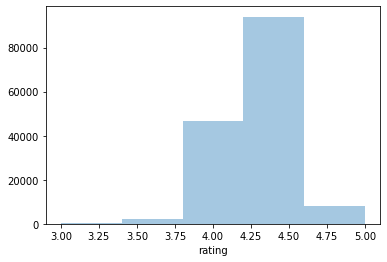

In [26]:
# Let's start by plotting histograms of general food rating and fast food rating
sns.distplot(yelp_df['rating'], kde=False, bins=5);

f1 = plt.gcf()

In [27]:
# There are 5 possible ratings in our data set: 3, 3.5, 4, 4.5, and 5
yelp_df["rating"].unique()

array([4.5, 4. , 5. , 3.5, 3. ])

In [28]:
# It appears that our rating data is normal-ish and is skewed right. We have a mean of 4.358 and an std of .294.
yelp_df["rating"].describe()

count    150980.000000
mean          4.358157
std           0.294299
min           3.000000
25%           4.000000
50%           4.500000
75%           4.500000
max           5.000000
Name: rating, dtype: float64

Note that the fast food dataset doesn't have a rating column. We will need to merge the two datasets ...

In [ ]:
# NOTE: do we need this cell anymore since we now have fast food ratings from fast_ratings_df?
# To get the ratings of the data found in the fast food dataset, we merge the yelp dataset (which has the ratings) with the fast food dataset 
merged_df = fast_df
merged_df['ratings'] = np.nan
for i in fast_df.index:
    for j in yelp_df.index:
        if merged_df.at[i, 'name'] == yelp_df.at[j, 'name']:
            if merged_df.at[i, 'address'] == yelp_df.at[j, 'address']:
                merged_df.iloc[i].ratings = yelp_df.iloc[j].rating

merged_df.dropna()

print(merged_df)

In [ ]:
#TODO: Explain what the merged df shows/means

In [ ]:
# TODO: describe the lattitude/longitude data to see if there is any bias in geography for our 2 datasets

In [ ]:
# TODO: maybe move the null row removal into the data cleanup section rather than analysis

### Fast Food Ratings Analysis

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions